In [75]:
# Question:-
# Data Wrangling II
# Create an “Academic performance” dataset of students and perform the following operations using 
# Python.
# 1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
# inconsistencies, use any of the suitable techniques to deal with them. 
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable 
# techniques to deal with them. 
# 3. Apply data transformations on at least one of the variables. The purpose of this 
# transformation should be one of the following reasons: to change the scale for better 
# understanding of the variable, to convert a non-linear relation into a linear one, or to 
# decrease the skewness and convert the distribution into a normal distribution. 
# Reason and document your approach properly.

In [76]:
#import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Dataset CSV
url = "eduData.csv"
df = pd.read_csv(url)
print(df.head(10))

  gender NationalITy PlaceofBirth       StageID GradeID SectionID Topic  \
0    NaN          KW       KuwaIT    lowerlevel    G-04         A    IT   
1      M          KW          NaN    lowerlevel    G-04         A   NaN   
2      M          KW       KuwaIT           NaN    G-04         A    IT   
3      M          KW       KuwaIT    lowerlevel    G-04         A    IT   
4    NaN          KW       KuwaIT    lowerlevel    G-04         A    IT   
5      F          KW       KuwaIT    lowerlevel    G-04         A    IT   
6      M          KW       KuwaIT  MiddleSchool    G-07         A   NaN   
7      M          KW          NaN  MiddleSchool    G-07         A  Math   
8      F          KW       KuwaIT  MiddleSchool    G-07         A  Math   
9      F          KW       KuwaIT  MiddleSchool    G-07         B    IT   

  Semester Relation   cns   dsa  oops  os  
0        F   Father   NaN  16.0     2  20  
1        F   Father  20.0  20.0     3  25  
2        F   Father  10.0   7.0     0  30 

In [77]:
#check no null value in each column
print(df.isnull().sum())

gender          6
NationalITy     1
PlaceofBirth    5
StageID         2
GradeID         1
SectionID       0
Topic           4
Semester        0
Relation        2
cns             7
dsa             1
oops            0
os              0
dtype: int64


In [78]:
# Ways to fill the null values
# 1. simply drop the row having null value
# 2. imputate with mean,median or mode.
# 3.fill with random value like "Unknown"
# 4.replace categorical variable with previous value
# 5.replace inconsitent data with null value.
#6. imputate by interpolation


In [79]:
#drop the whole row which is having NULL value
t=df.dropna()
print(t.isnull().sum())
print("Before dropping null values:- ",t.shape)
print("After dropping null values:- ",df.shape)

gender          0
NationalITy     0
PlaceofBirth    0
StageID         0
GradeID         0
SectionID       0
Topic           0
Semester        0
Relation        0
cns             0
dsa             0
oops            0
os              0
dtype: int64
Before dropping null values:-  (9, 13)
After dropping null values:-  (28, 13)


In [80]:
#imputation by mean
url = "eduData.csv"
df = pd.read_csv(url)
df["cns"]=df["cns"].replace(np.NAN,df["cns"].mean())

print(df["cns"])

0     25.571429
1     20.000000
2     10.000000
3     25.571429
4     40.000000
5     42.000000
6     35.000000
7     25.571429
8     12.000000
9     25.571429
10    50.000000
11    19.000000
12     5.000000
13    20.000000
14    25.571429
15    30.000000
16    36.000000
17    25.571429
18    69.000000
19    70.000000
20    25.571429
21    10.000000
22    15.000000
23     2.000000
24     0.000000
25     8.000000
26    19.000000
27    25.000000
Name: cns, dtype: float64


In [81]:
# imputation using interpolation
# Linear Interpolation simply means to estimate a missing value by connecting dots in a straight line in 
# increasing order. In short, It estimates the unknown value in the same increasing order from previous values.

In [82]:
import statistics
df = pd.read_csv(url)
df["cns"]=df["cns"].interpolate(method='linear')
print(df["cns"])

0      NaN
1     20.0
2     10.0
3     25.0
4     40.0
5     42.0
6     35.0
7     23.5
8     12.0
9     31.0
10    50.0
11    19.0
12     5.0
13    20.0
14    25.0
15    30.0
16    36.0
17    52.5
18    69.0
19    70.0
20    40.0
21    10.0
22    15.0
23     2.0
24     0.0
25     8.0
26    19.0
27    25.0
Name: cns, dtype: float64


In [83]:
#replace categorical variable with random value
df["gender"]=df["gender"].fillna('unknown')
print(df["gender"])

0     unknown
1           M
2           M
3           M
4     unknown
5           F
6           M
7           M
8           F
9           F
10          M
11          M
12          M
13          M
14          F
15          F
16    unknown
17          M
18          F
19    unknown
20          F
21          F
22          M
23    unknown
24          M
25          M
26    unknown
27          M
Name: gender, dtype: object


In [84]:
#replace categorical variable with previous value
df = pd.read_csv(url)
df["gender"]=df["gender"].fillna(method='ffill')
print(df["gender"])

0     NaN
1       M
2       M
3       M
4       M
5       F
6       M
7       M
8       F
9       F
10      M
11      M
12      M
13      M
14      F
15      F
16      F
17      M
18      F
19      F
20      F
21      F
22      M
23      M
24      M
25      M
26      M
27      M
Name: gender, dtype: object


In [85]:
df = pd.read_csv(url)
#creating the inconsistent data
df["gender"]=df["gender"].fillna(100)
cnt=0
for row in df["gender"]:
    try:
        int(row)
        df.loc[cnt,"gender"]=np.nan
    except ValueError:
        pass
    cnt+=1
    
print(df["gender"])

0     NaN
1       M
2       M
3       M
4     NaN
5       F
6       M
7       M
8       F
9       F
10      M
11      M
12      M
13      M
14      F
15      F
16    NaN
17      M
18      F
19    NaN
20      F
21      F
22      M
23    NaN
24      M
25      M
26    NaN
27      M
Name: gender, dtype: object


In [86]:
#data Tranformation to decrease the skewness
# Skewness is a measure of the asymmetry of the probability distribution of a 
#real-valued random variable about its mean.
df.skew(numeric_only=True)

cns     0.946321
dsa     1.241056
oops    0.440346
os      0.056839
dtype: float64

array([[<AxesSubplot:title={'center':'cns'}>,
        <AxesSubplot:title={'center':'dsa'}>],
       [<AxesSubplot:title={'center':'oops'}>,
        <AxesSubplot:title={'center':'os'}>]], dtype=object)

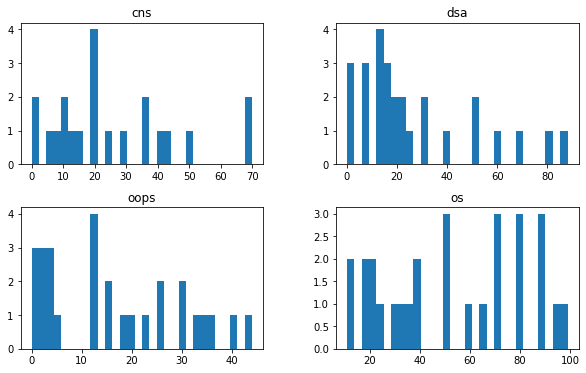

In [87]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [88]:
df.insert(len(df.columns), 'dsa_Sqrt',
         np.sqrt(df.dsa))

In [89]:
df.skew(numeric_only=True)

cns         0.946321
dsa         1.241056
oops        0.440346
os          0.056839
dsa_Sqrt    0.291450
dtype: float64

<AxesSubplot:xlabel='os'>

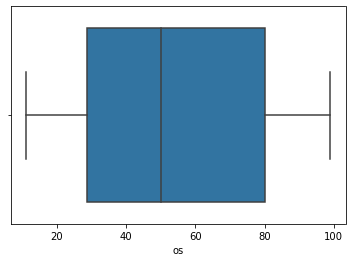

In [90]:
#identify outliers and handle them
sns.boxplot(x=df["os"])

<AxesSubplot:xlabel='cns'>

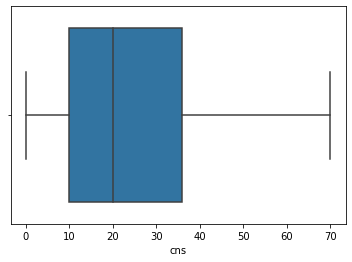

In [91]:
sns.boxplot(x=df["cns"])

<AxesSubplot:xlabel='dsa'>

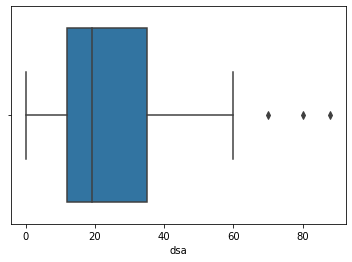

In [92]:
#We can clearly see that 3 values greater than 60 are outliers.
sns.boxplot(x=df["dsa"])

In [93]:
print(np.where(df['dsa']>65))
outliers=np.where(df['dsa']>65)
df.head(10)
df.shape

(array([ 9, 10, 14]),)


(28, 14)

In [94]:
print(df)

   gender NationalITy PlaceofBirth       StageID GradeID SectionID   Topic  \
0     NaN          KW       KuwaIT    lowerlevel    G-04         A      IT   
1       M          KW          NaN    lowerlevel    G-04         A     NaN   
2       M          KW       KuwaIT           NaN    G-04         A      IT   
3       M          KW       KuwaIT    lowerlevel    G-04         A      IT   
4     NaN          KW       KuwaIT    lowerlevel    G-04         A      IT   
5       F          KW       KuwaIT    lowerlevel    G-04         A      IT   
6       M          KW       KuwaIT  MiddleSchool    G-07         A     NaN   
7       M          KW          NaN  MiddleSchool    G-07         A    Math   
8       F          KW       KuwaIT  MiddleSchool    G-07         A    Math   
9       F          KW       KuwaIT  MiddleSchool    G-07         B      IT   
10      M          KW       KuwaIT  MiddleSchool    G-07         A    Math   
11      M          KW       KuwaIT  MiddleSchool    G-07        

In [96]:
new_df = df.drop(df.index[outliers])


In [101]:
print("Previous size :-",df.shape)
print("Current size :- ",new_df.shape)

Previous size :- (28, 14)
Current size :-  (25, 14)
